<a href="https://colab.research.google.com/github/juandiego2205/Biosenales/blob/main/P3_Juan_Caguasango_Kevin_Garcia/P3_Juan_Caguasango_Kevin_Garcia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PRACTICA_3**


```
Kevin Estiven Garcia Jaramillo: 1001132918
Juan Diego Caguasango: 1004232960
```




In [ ]:
# Se importaron las libreras necesarias para la practica
import pandas as pd # libreria para manejo de datos
from tabulate import tabulate # libreria para imprimir tablas
from scipy.io import loadmat # carga los datos .mat
from scipy.signal import find_peaks #funcion que sirve para detectar los maximos picos de elevacipon de la señal
from scipy import stats # funciones de probabilidad
import numpy as np #libreria de matrices y vectores
import matplotlib.pyplot as plt # librera de graficas

In [ ]:
# Funcion para determinar el error cuadratico
def RMS (Senal):
    len(Senal)
    rms = np.sqrt(np.mean(np.square(Senal)))
    return rms


se puede observar la creación de una función RMS, que nos permite ver la media cuadratica de cualquier señal que sea introducida en ella, funciona primero con el calculo del promedio de los cuadrados de la misma, que posteriormente se le aplica una raiz cuadrada.

Su utilidad radica en la variación y dispersión de los datos, entre mas alto, mas dispersos son

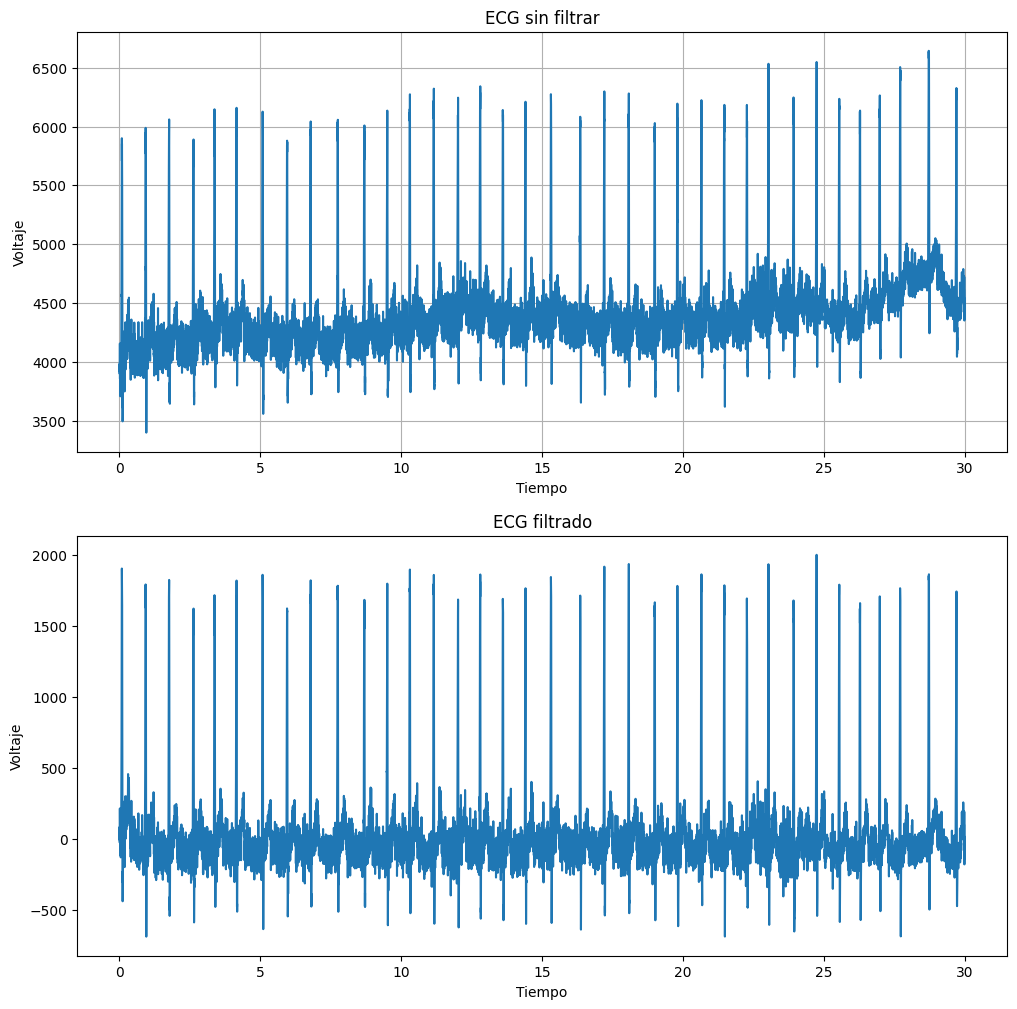

In [ ]:
# sirve para evitar el anuncio de advertencia de numpy
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
# se carga la señal
data=loadmat("signals.mat")
Fs=data["Fs"]
time=np.arange(0,(len(data['ECG_asRecording'][0]))/Fs,1/Fs)
#Graficación de la función filtrada y de la no filtrada ECG
plt. figure(figsize=(12,12))
plt.subplot(2,1,2)
plt.plot(time,data['ECG_filtered'][0])
plt.xlabel("Tiempo")
plt.ylabel("Voltaje")
plt.title("ECG filtrado")
plt.subplot(2,1,1)
plt.plot(time,data['ECG_asRecording'][0])
plt.xlabel("Tiempo")
plt.ylabel("Voltaje")
plt.title("ECG sin filtrar")
plt.grid()
plt.show()


En la primera gráfica se observa una señal de ECG afectada por una frecuencia más baja que introduce ruido en la señal. En la segunda gráfica, la señal ya aparece filtrada, evidenciando que el ruido ha sido eliminado. Esto es posiblemente el resultado del uso de un filtro pasa altas, que permitió eliminar las frecuencias bajas no deseadas, mejorando así la calidad de la señal.

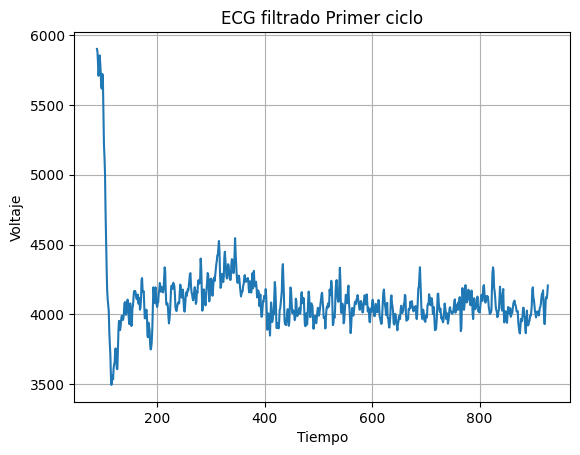

RMS:  4113.056761304678
Varianza:  63562.408773818526
Desviacion estandar:  252.11586378849412


In [ ]:
# Función para encontrar los picos R de todo el ECG y descubrir donde se realiza un ciclo
picos = find_peaks(data['ECG_asRecording'][0], distance=Fs * 0.6)
inicio_ciclo=picos[0][0]
fin_ciclo=picos[0][1]
ECG_SinFiltro=data['ECG_asRecording'][0][inicio_ciclo:fin_ciclo-25]
time2=np.arange(inicio_ciclo,fin_ciclo-25,1)
#Graficación del ciclo de ECG
plt.plot(time2,ECG_SinFiltro)
plt.xlabel("Tiempo")
plt.ylabel("Voltaje")
plt.title("ECG filtrado Primer ciclo")
plt.grid()
plt.show()
#Analisis Estatistico del ciclo
RMSX=RMS(ECG_SinFiltro)
Varianzax=np.var(ECG_SinFiltro)
Desviacionx=np.std(ECG_SinFiltro)
print("RMS: ",RMSX)
print("Varianza: ",Varianzax)
print("Desviacion estandar: ",Desviacionx)






#Ciclo en Señal sin Filtro
 Para identificar el ciclo cardíaco en toda la señal, primero se localizaron los picos más altos, correspondientes a la onda R. Estos picos son puntos clave para determinar los ciclos cardíacos.

Además, se analizaron tres variables estadísticas en el mismo ciclo: varianza, RMS y desviación estándar. Cada una de ellas arrojó valores elevados, lo que indica que los datos están muy dispersos. Esto sugiere la presencia de un considerable nivel de ruido en la señal.

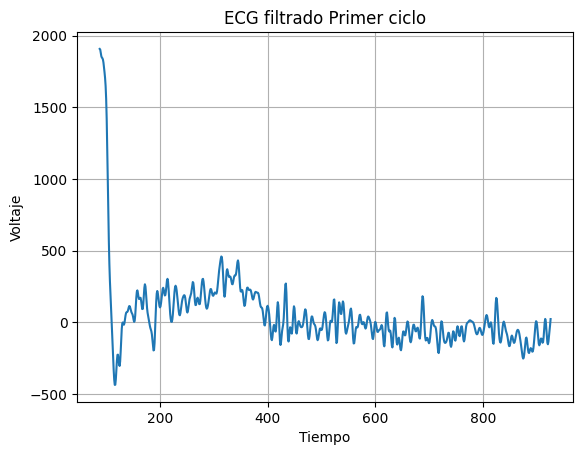

RMS:  278.66306595538975
Varianza:  74850.48120121569
Desviacion estandar:  273.5881598337466


In [ ]:
# Función para encontrar los picos R de todo el ECG y descubrir donde se realiza un ciclo
picos2 = find_peaks(data['ECG_filtered'][0], distance=Fs * 0.6)
inicio_ciclo2=picos2[0][0]
fin_ciclo2=picos2[0][1]
ECG_Filtro=data['ECG_filtered'][0][inicio_ciclo2:fin_ciclo2-25]
time3=np.arange(inicio_ciclo2,fin_ciclo2-25,1)
#Graficación del ciclo de ECG
plt.plot(time3,ECG_Filtro)
plt.xlabel("Tiempo")
plt.ylabel("Voltaje")
plt.title("ECG filtrado Primer ciclo")
plt.grid()
plt.show()
#Analisis Estatistico del ciclo
RMSX=RMS(ECG_Filtro)
Varianzax=np.var(ECG_Filtro)
Desviacionx=np.std(ECG_Filtro)
print("RMS: ",RMSX)
print("Varianza: ",Varianzax)
print("Desviacion estandar: ",Desviacionx)

#Ciclo en Señal con Filtro
En este nuevo caso, se puede observar que, tras aplicar el filtro a la señal, las variables estadísticas han cambiado. La varianza y la desviación estándar aumentaron ligeramente, lo que indica que los datos se dispersaron un poco más respecto a la media. Sin embargo, la RMS disminuyó, lo que sugiere que los picos en la señal se han reducido. Esto se debe a que las componentes de baja frecuencia desaparecieron después del filtrado.

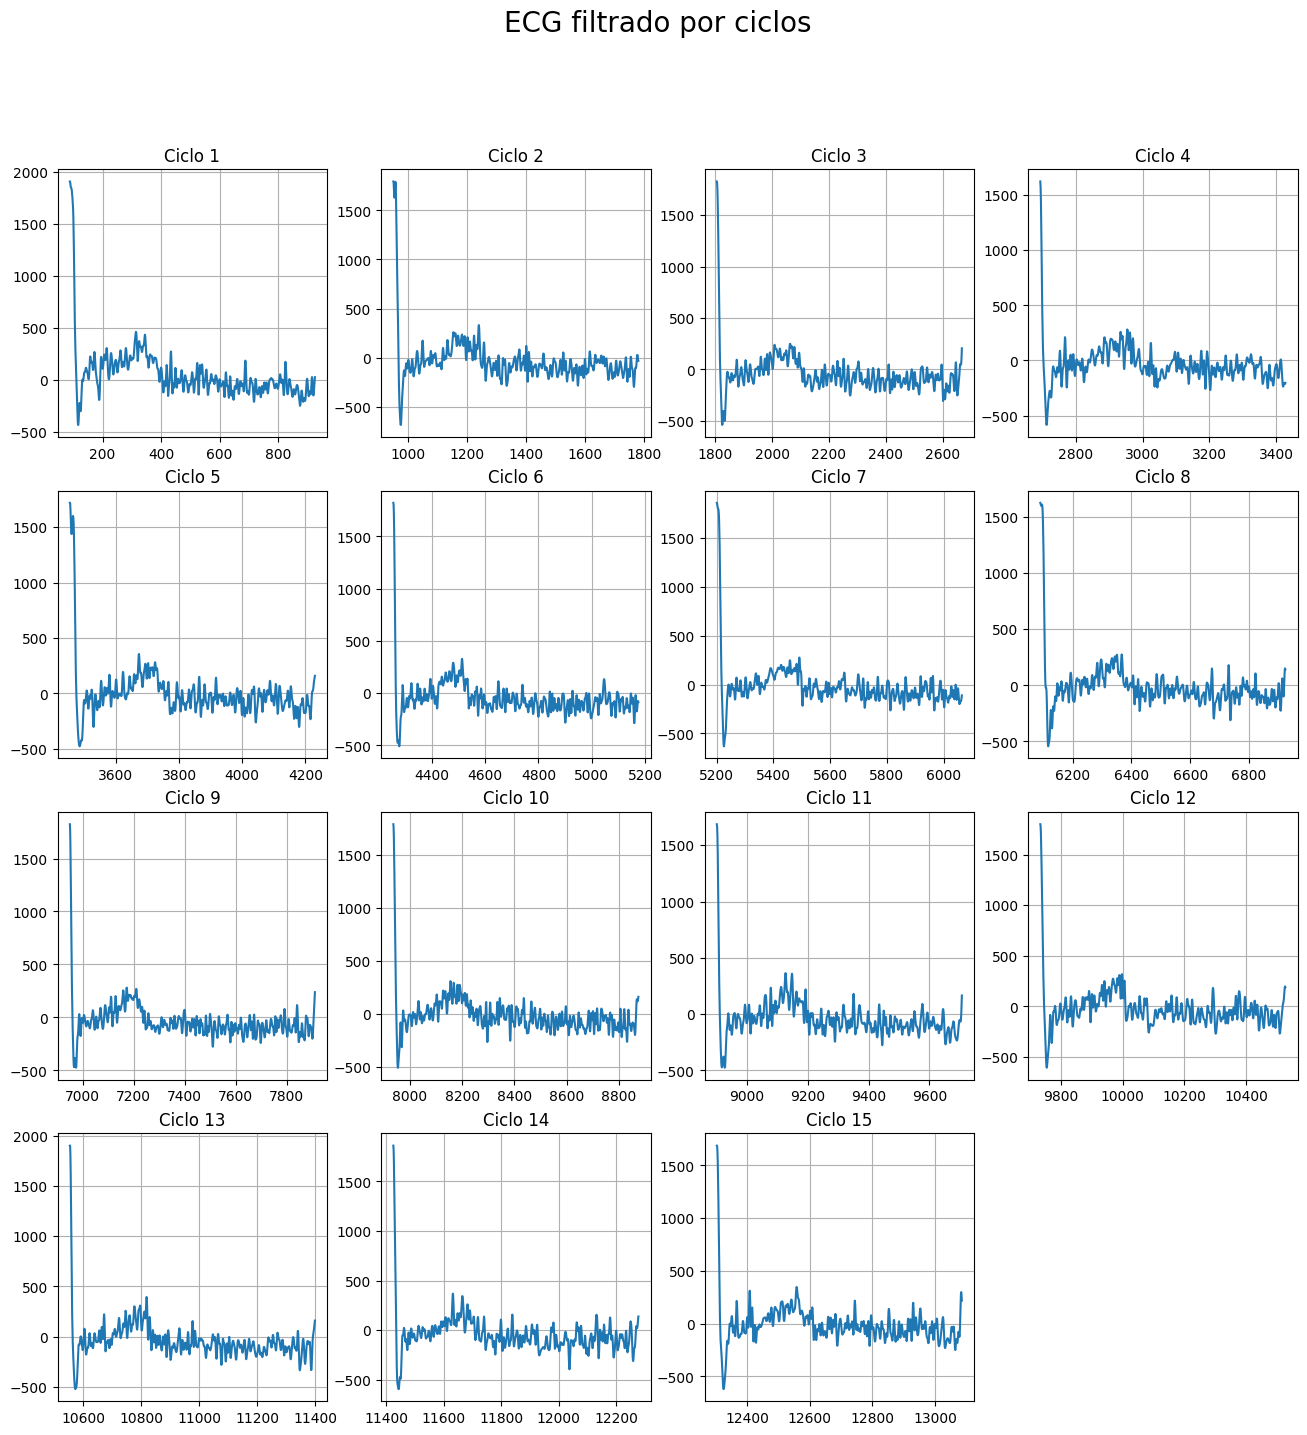

 Ciclo        RMS     Varianza  Des. estándar
     1 278.663066 74850.481201     273.588160
     2 249.932977 61312.797258     247.614211
     3 200.107583 38065.882020     195.104798
     4 175.687544 29348.073986     171.312796
     5 255.233928 65128.681175     255.203215
     6 186.074544 32238.051103     179.549578
     7 242.430335 58443.167456     241.750217
     8 226.631794 51158.616337     226.182706
     9 174.243371 28680.188107     169.352260
    10 176.075132 30607.879076     174.951076
    11 185.147142 32503.072928     180.286086
    12 199.889795 39336.174903     198.333494
    13 194.098323 36050.853248     189.870622
    14 196.496949 36428.929981     190.863642
    15 191.931782 36726.728245     191.642188


In [ ]:
des=[]
Rm=[]
Var=[]
ciclos=[]
plt.figure(figsize=(16,16))
plt.suptitle("ECG filtrado por ciclos", fontsize=20)
# Grafica de forma automatica los 15 primeros ciclos cardiacos
for i in range(1,16):
  inicio_ciclo3=picos2[0][i-1]
  fin_ciclo3=picos2[0][i]
  Senal=data['ECG_filtered'][0][inicio_ciclo3:fin_ciclo3-25]
  time4=np.arange(inicio_ciclo3,fin_ciclo3-25,1)
  plt.subplot(4,4,i)
  plt.plot(time4,Senal)
  plt.title("Ciclo "+str(i))
  plt.grid()
  ciclos.append(Senal)
  RMSX=RMS(Senal)
  Varianzax=np.var(Senal)
  Desviacionx=np.std(Senal)
  des.append(Desviacionx)
  Rm.append(RMSX)
  Var.append(Varianzax)
plt.show()
# Realiza el analisis estadistico de los 15 primeros ciclos
df_ciclos = pd.DataFrame({
    'Ciclo': range(1, 16),
    'RMS': Rm,
    'Varianza': Var,
    'Des. estándar': des
})
# Aplicar un gradiente de color en las columnas estadísticas
print(df_ciclos.to_string(index=False))


Si observamos las gráficas, se puede visualizar una constancia en el ciclo cardíaco, ya que todas parecen tener una forma similar. Esto sugiere que la señal es estacionaria e invariante en el tiempo, lo que permite predecirla basándose en valores anteriores.

Por otro lado, aunque los datos de dispersión—como la varianza, la desviación estándar y el RMS—no permanecen constantes, lo cual sería el caso ideal, las variaciones entre los ciclos son mínimas. Esto indica que la señal tiende a ser estacionaria, a pesar de las pequeñas fluctuaciones en las medidas de dispersión.



In [ ]:
alpha=0.05 #valor de significancia
for i in range(4): #verificar normalidad de los 4 primeros ciclos
    [statistic,pvalue]=stats.normaltest(ciclos[i])
    if pvalue > alpha:
        print(f'Ciclo {i+1} distribuye normal')
    else:
        print(f'Ciclo {i+1} no distribuye normal')
#Homocedasticidad
[statistic,pvalue]=stats.levene(ciclos[0],ciclos[1],ciclos[2],ciclos[3])
if pvalue > alpha:
    print('\nCumple supuesto de homocedasticidad') #varianzas no son significativamente diferentes
else:
    print('\nNo cumple supuesto de homocedasticidad')


Ciclo 1 no distribuye normal
Ciclo 2 no distribuye normal
Ciclo 3 no distribuye normal
Ciclo 4 no distribuye normal

No cumple supuesto de homocedasticidad


Se comprobó si cada uno de los ciclos cumplía con los criterios necesarios para realizar una prueba paramétrica o si, en realidad, era más adecuado utilizar una prueba no paramétrica para evaluar la independencia entre los valores de cada ciclo recortado de la señal principal. Dado que los requisitos para las pruebas paramétricas no se cumplieron, se concluye que es más factible aplicar una prueba no paramétrica.

In [ ]:
#Prueba parametrica T student para dos grupos
[statistic,pvalue]=stats.ttest_ind(ciclos[0],ciclos[1])
if pvalue < alpha:
    print('Existe diferencia estadística entre los ciclos 1 y 2')
else:
    print('No existe diferencia significativa entre los ciclos 1 y 2')
print(f'pvalue={pvalue}')

[statistic,pvalue]=stats.ttest_ind(ciclos[2],ciclos[3])
if pvalue < alpha:
    print('Existe diferencia estadística entre los ciclos 3 y 4')
else:
    print('No existe diferencia significativa entre los ciclos 3 y 4')
print(f'pvalue={pvalue}')


Existe diferencia estadística entre los ciclos 1 y 2
pvalue=1.5006693925585765e-11
No existe diferencia significativa entre los ciclos 3 y 4
pvalue=0.5526838999020511


La prueba t de Student presentó dos análisis contradictorios, lo que indica que realizar una prueba paramétrica no era la opción más adecuada para verificar las diferencias entre los dos ciclos cardíacos.

In [ ]:
#Prueba no parametrica Mann Whitneyu
[statistic,pvalue]=stats.mannwhitneyu(ciclos[0],ciclos[1])
if pvalue < alpha:
    print('Existe diferencia estadística entre los ciclos 1 y 2')
else:
    print('No existe diferencia significativa entre los ciclos 1 y 2')
print(f'pvalue={pvalue}')
#entre ciclos 3 y 4
[statistic,pvalue]=stats.mannwhitneyu(ciclos[2],ciclos[3])
if pvalue < alpha:
    print('Existe diferencia estadística entre los ciclos 3 y 4')
else:
    print('No existe diferencia significativa entre los ciclos 3 y 4')
print(f'pvalue={pvalue}')


Existe diferencia estadística entre los ciclos 1 y 2
pvalue=1.6853683452715708e-28
Existe diferencia estadística entre los ciclos 3 y 4
pvalue=0.023042595210872895


Por otro lado, la prueba no paramétrica realizada posteriormente mostró mejores resultados, ya que la comparación entre los dos pares de ciclos arrojó la misma respuesta consistente.

In [ ]:
from statsmodels.tsa.stattools import adfuller
df=[]
dfa=[]
estados=[]
for i in range(15):
    dfuller=adfuller(ciclos[i])
    if dfuller[1] > alpha: #dfuller[1] es el valor p
        estado="Estacionario" #esto puede ser así o al revés
    else:
        estado="No estacionaro"
    df.append(dfuller[0])
    dfa.append(dfuller[1])
    estados.append(estado)
df_ciclos2 = pd.DataFrame({
    'Ciclo': range(1, 16),
    'P': df,
    'ADF': dfa,
    'Estado': estado
})
print(df_ciclos2.to_string(index=False))

 Ciclo         P      ADF       Estado
     1 -1.575148 0.496065 Estacionario
     2  0.162461 0.970076 Estacionario
     3  1.173189 0.995795 Estacionario
     4 -1.284407 0.636276 Estacionario
     5  0.819552 0.991945 Estacionario
     6 -1.128762 0.703467 Estacionario
     7 -1.811805 0.374617 Estacionario
     8  1.939049 0.998588 Estacionario
     9  1.107827 0.995283 Estacionario
    10  0.404098 0.981648 Estacionario
    11 -0.639811 0.861730 Estacionario
    12  0.703465 0.989907 Estacionario
    13  0.069481 0.963915 Estacionario
    14  0.442248 0.983008 Estacionario
    15  1.100323 0.995219 Estacionario


Finalmente, se realizó una prueba ADF para verificar el análisis previo sobre la señal en cuanto a su estacionariedad. Los resultados de la prueba confirmaron que la señal era completamente estacionaria.



# Conclusiones
- Las señales aleatorias que presentan un patrón identificable a través de análisis estadísticos son conocidas como señales estacionarias. Estas se caracterizan por la constancia en los factores de dispersión y varianza.
- Las pruebas paramétricas requieren un análisis previo de normalidad en los datos. Sin este análisis, los resultados pueden ser inconsistentes entre sí, lo que demuestra ineficiencia en la prueba.
- La señal del ECG puede considerarse una señal estacionaria, ya que, aunque no necesariamente tiene un patrón preestablecido, presenta un ciclo repetitivo claro.
- Los filtros aplicados a señales fisiológicas son útiles para reducir el ruido, pero también pueden causar una ligera dispersión en los datos, tal como se ha evidenciado en esta práctica.

# Referencias:

 [1] (S/f). Minitab.com. Recuperado el 11 de septiembre de 2024, de https://blog.minitab.com/es/pruebas-t-valores-t-distribuciones-t

 [2] (S/f-b). Libretexts.org. Recuperado el 11 de septiembre de 2024, de https://espanol.libretexts.org/Estad%C3%ADsticas/Cap%C3%ADtulo_1:_Introducci%C3%B3n_a_la_Estad%C3%ADstica_Descriptiva

 [3] Lima, D. A. L. (2023, marzo 16). Electrocardiograma (ECG): qué es, cómo leerlo y para qué sirve. Tua Saúde. https://www.tuasaude.com/es/electrocardiograma/

[4] Torres, M. E., & Schlotthauer, G. (2016). No-estacionariedad, multifractalidad y limpieza de ruido en señales reales. Torres, Maria Eugenia; Schlotthauer, Gaston; No-estacionariedad, multifractalidad y limpieza de ruido en señales reales; Universidad Nacional de Entre Ríos; Ciencia, Docencia y Tecnología Suplemento, 6, 6; 11. https://ri.conicet.gov.ar/handle/11336/117768







